In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
475,7.38,10.0,0
115,7.28,37.0,0
903,7.56,28.0,1
416,7.51,55.0,1
597,7.85,32.0,0


In [ ]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [ ]:
df.duplicated().sum()

19

In [ ]:
df.shape

(1000, 3)

Text(0.5, 0, 'placement_exam_marks')

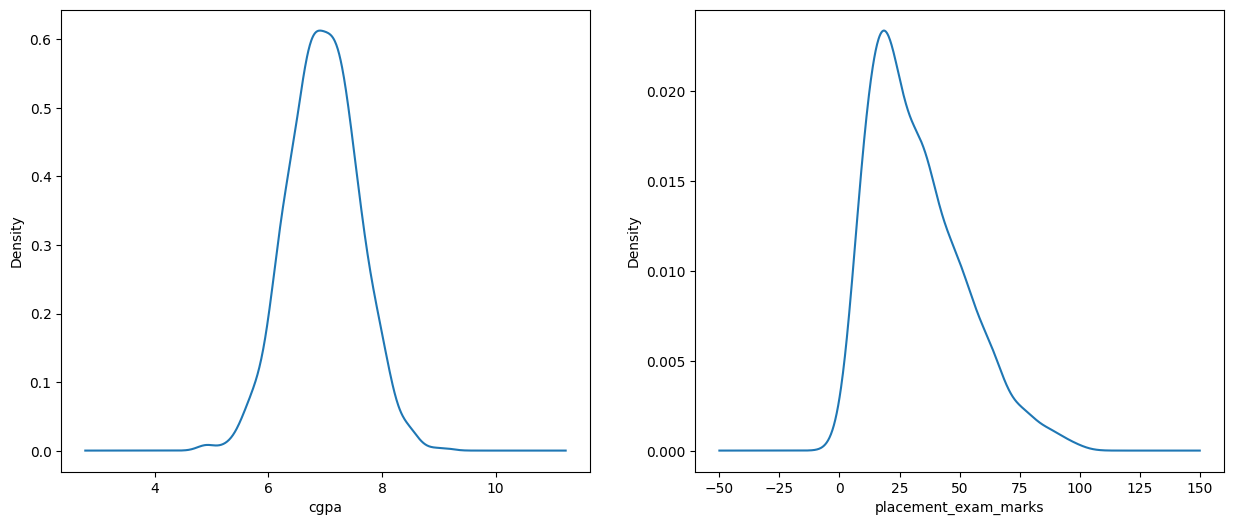

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
df['cgpa'].plot(kind='kde',ax=ax1)
ax1.set_xlabel('cgpa')
df['placement_exam_marks'].plot(kind='kde',ax=ax2)
ax2.set_xlabel('placement_exam_marks')

In [ ]:
# cgpa is normal distribution bt the placement_exam_marks is skewed
df['placement_exam_marks'].skew()

0.8356419499466834

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [ ]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [ ]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.113)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# trimming
df_new=df[(df['cgpa']>8.80) | (df['cgpa']<5.113)]
df_new

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## using Z score

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score=np.abs(zscore(df[['cgpa','placement_exam_marks']]))
z_score

,cgpa,placement_exam_marks
0,0.371611,0.325554
1,0.810215,0.302020
2,0.940171,0.406616
3,0.879222,1.266915
4,0.436589,0.796234
...,...,...
995,3.100701,0.615807
996,3.506815,1.714061
997,3.364643,0.092829
998,2.694586,0.720403


In [ ]:
df_no_outliers=df[(z_score<-3.all(axis=1))]
df_no_outliers


SyntaxError: invalid decimal literal (3562952298.py, line 1)

In [ ]:
print("Original Shape:", df.shape)
print("After Outlier Removal:", df_no_outliers.shape)

Original Shape: (1000, 3)
After Outlier Removal: (0, 3)
